In [1]:
import pickle
import pandas as pd
import numpy as np
import json

In [2]:
#pip install --upgrade pandas==1.4.3
pd.set_option('display.max_rows', 1000)

In [7]:
path = r'' # path to data files

In [8]:
# names = pd.read_json(path+'names.json',orient = 'index')
# names.reset_index(inplace = True)
# names.columns = ['Label', 'Task']

names = json.load(open(path+'names.json'))

In [9]:
data = pickle.load(open(path+'data.pkl','rb'))
data['task'] =  data['task'].astype('Int32') 
data['task_lead'] = data.task.shift(1)
data['res'] = data.task- data.task_lead
data.fillna(0, inplace =True)
data['change'] = np.nan

In [10]:
counter = 0
def change(task, res):
    global counter
    if ((res == 1) & (task ==1)):
        
#         print(index)
        return res + counter
    elif res == -1:
        counter = counter+1
        return 'a'

In [11]:
data.change  = data.apply(lambda x: change(x.task, x.res), axis=1)

In [12]:
data.change = data.change.ffill().replace('a', 0).fillna(0)

In [13]:
data.change = data.change.astype('Int32').astype(str)




In [14]:
data.change.replace(names, inplace = True)

In [19]:
# data

In [15]:
show_data = data.loc[data.change != '0'].groupby('change').agg(counts = pd.NamedAgg(column='change', aggfunc = 'count')).reset_index().rename(columns={'change':'task'})

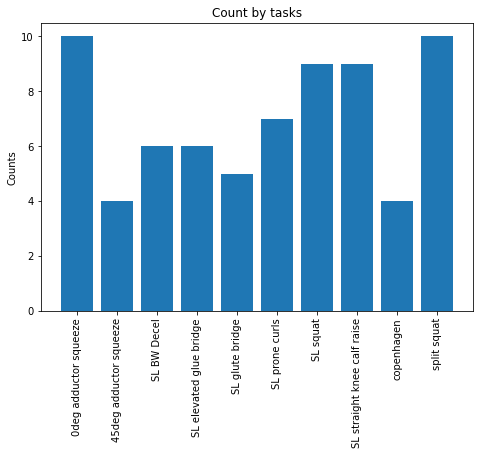

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(show_data.task, show_data.counts)
plt.xticks(rotation=90)
ax.set_ylabel('Counts')
ax.set_title('Count by tasks')
# plt.savefig('Task1.Jpg',  bbox_inches='tight')

plt.show()
# plt.close()